In [1]:
import torch
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

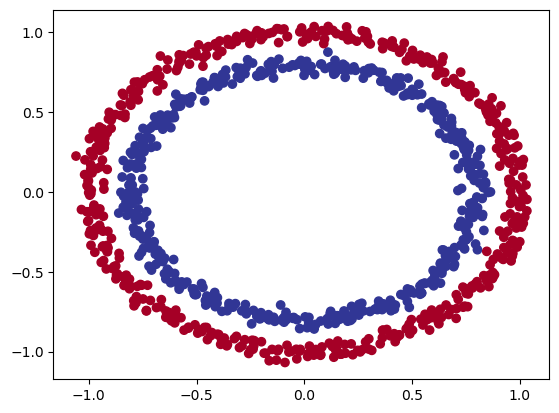

In [2]:
samples = 1000
x,y = make_circles(samples, noise=0.03, random_state=42)
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.RdYlBu)


In [3]:
#convert data to tensor and train test split
from sklearn.model_selection import train_test_split
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2, random_state=42)



In [4]:
#create a model(non linear) with non linear activation function 
class circlemodel(nn.Module):
    def __init__(self):
        super(circlemodel, self).__init__()
        self.layer1 = nn.Linear(2, 10)
        self.layer2 = nn.Linear(10, 10)
        self.layer3 = nn.Linear(10, 1)
        self.relu = nn.ReLU()#relu is a non linear activation function
        
    def forward(self, x):
       return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))
model = circlemodel() 
model

circlemodel(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [5]:
#set loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [14]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
#train and test with non linearity model

epochs =1000

for epoch in range(epochs):
    model.train()
    y_logits = model(xtrain).squeeze()   # Raw logits
    y_pred = torch.round(torch.sigmoid(y_logits))  # Apply sigmoid here for predictions
    train_loss = loss_fn(y_logits, ytrain)   
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    model.eval()
    with torch.inference_mode():
        test_logits = model(xtest).squeeze()  # Raw logits
        test_pred = torch.round(torch.sigmoid(test_logits))  # Apply sigmoid here
        test_loss = loss_fn(test_logits, ytest)  # Add .unsqueeze(1)             # Still raw logits

    
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | accuracy: {torch.round(torch.mean((test_pred == ytest).type(torch.float)) * 100):.2f}%") 

Epoch: 0 | Train Loss: 0.0195 | Test Loss: 0.0398 | accuracy: 100.00%
Epoch: 100 | Train Loss: 0.0170 | Test Loss: 0.0358 | accuracy: 100.00%
Epoch: 200 | Train Loss: 0.0150 | Test Loss: 0.0326 | accuracy: 100.00%
Epoch: 300 | Train Loss: 0.0134 | Test Loss: 0.0298 | accuracy: 100.00%
Epoch: 400 | Train Loss: 0.0120 | Test Loss: 0.0276 | accuracy: 100.00%
Epoch: 500 | Train Loss: 0.0110 | Test Loss: 0.0257 | accuracy: 100.00%
Epoch: 600 | Train Loss: 0.0100 | Test Loss: 0.0241 | accuracy: 100.00%
Epoch: 700 | Train Loss: 0.0093 | Test Loss: 0.0228 | accuracy: 100.00%
Epoch: 800 | Train Loss: 0.0086 | Test Loss: 0.0216 | accuracy: 100.00%
Epoch: 900 | Train Loss: 0.0080 | Test Loss: 0.0205 | accuracy: 100.00%


In [15]:
#make predictions and evaluate the model
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download.")
else:
    print("Downloading helper_functions.py...")
    url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py"
    response = requests.get(url)
    with open("helper_functions.py", "wb") as file:
        file.write(response.content)
from helper_functions import plot_decision_boundary, plot_predictions


helper_functions.py already exists, skipping download.


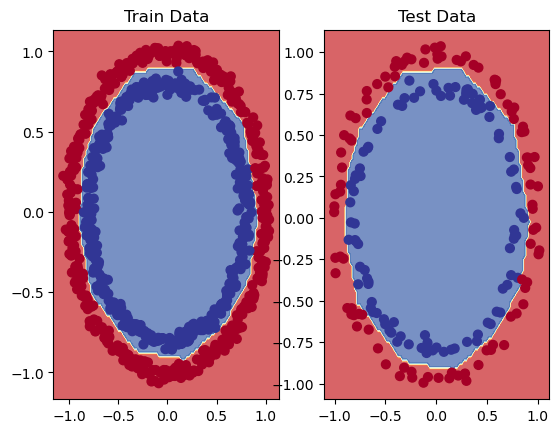

In [17]:
plt.subplot(1, 2, 1)
plt.title("Train Data")
plot_decision_boundary(model, xtrain, ytrain)
plt.subplot(1, 2, 2)
plt.title("Test Data")
plot_decision_boundary(model, xtest, ytest)